# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


###  Import Statements


In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [31]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [32]:
df_data = pd.read_csv('Determinants_of_Earnings (1).csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [33]:
df_data.shape

(2000, 96)

In [34]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [35]:
df_data.isna().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [36]:
df_data.fillna(0, inplace=True)
df_data.drop_duplicates(inplace=True)

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [37]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [38]:
#X_train, X_test, y_train, y_test = train_test_split(df_data.drop('EARNINGS',
                                                              #axis=1), df_data['EARNINGS'],
                                                              # test_size=0.2, random_state=42)


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [44]:
years_of_schooling = df_data['S'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(years_of_schooling, df_data['EARNINGS'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
    

0.06095719119722376

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [47]:
#dataframe for coefficients
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)


Intercept:  0.28289118614359765
Coefficient:  [1.27071624]


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

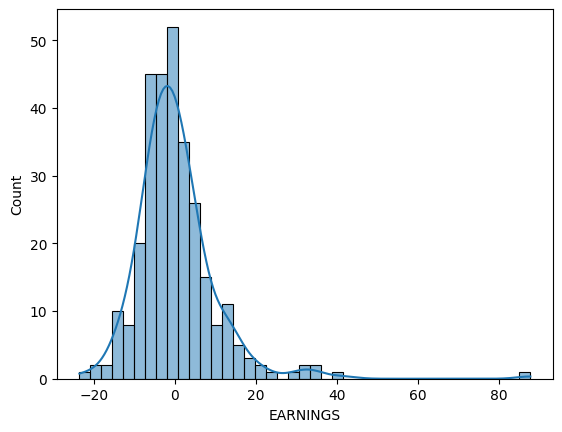

In [28]:
residuals = y_test - lr.predict(X_test)
hist = sns.histplot(residuals, kde=True)

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [48]:
S_and_EXP = df_data[['S', 'EXP']].values
X_train, X_test, y_train, y_test = train_test_split(S_and_EXP, df_data['EARNINGS'], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.score(X_test, y_test)

0.0731383929780548

### Evaluate the Coefficients of the Model

In [50]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  -14.647419747297562
Coefficient:  [1.84331414 0.98959959]


### Analyse the Estimated Values & Regression Residuals

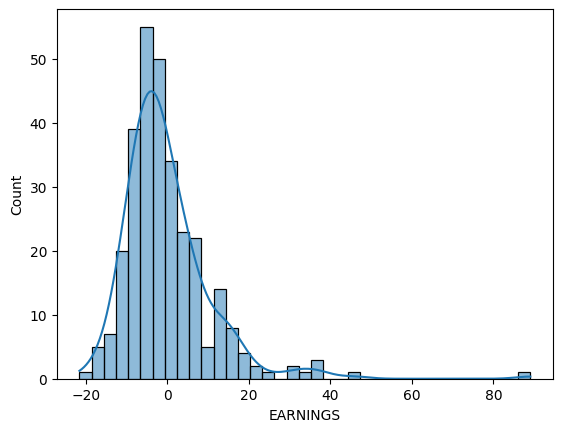

In [51]:
residuals = y_test - lr.predict(X_test)
hist = sns.histplot(residuals, kde=True)
    

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [52]:
lr.predict([[12, 5]])

array([12.42034794])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop('EARNINGS', axis=1),
                                                    df_data['EARNINGS'],
                                                    test_size=0.2, random_state=0)                    

In [57]:
#Linear Regression
#Polynomial Regression
#Support Vector Regression
#Decision Tree Regression
#Random Forest Regression
#XGBoost



#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)   
lr.score(X_test, y_test)



0.1772608732269847

In [58]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lr = LinearRegression() 
lr.fit(X_train_poly, y_train)
lr.score(X_test_poly, y_test)

-5.474083991077076

In [59]:
#Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
    

0.0409911149012403

In [60]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)
#too bad

-0.7480874439932121

In [61]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)


0.19301065690603236

In [62]:
#XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)
    

0.11354065174161954

--------------------------------------------------------------------------------------------------------


<AxesSubplot: >

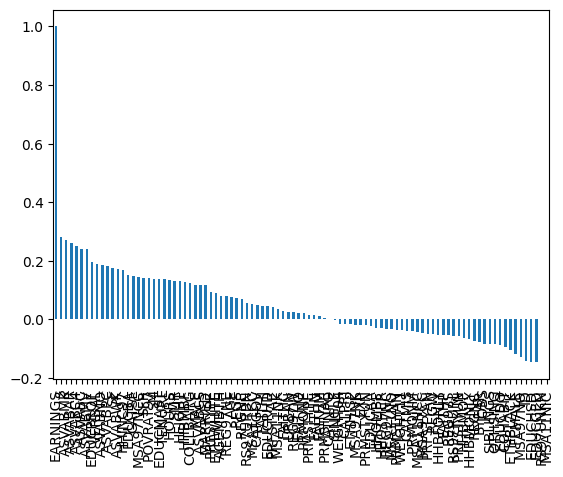

In [71]:
#Check correlation with earning
df_data.corr()['EARNINGS'].sort_values(ascending=False)
df_data.corr()['EARNINGS'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot: >

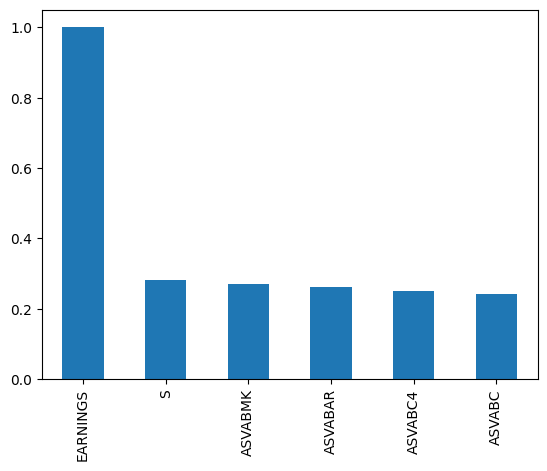

In [75]:
#Positive or negative largest 11 features
df_data.corr()['EARNINGS'].sort_values(ascending=False).head(6).plot(kind='bar')

<AxesSubplot: >

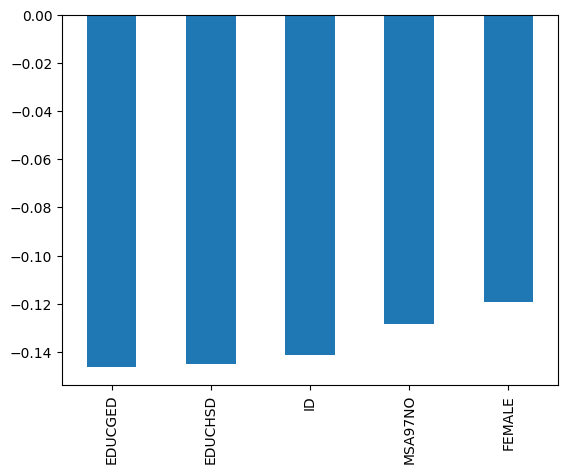

In [78]:
df_data.corr()['EARNINGS'].sort_values(ascending=True).head(5).plot(kind='bar')

In [83]:
positive_columns = df_data.corr()['EARNINGS'].sort_values(ascending=False).head(6).index
negative_columns = df_data.corr()['EARNINGS'].sort_values(ascending=True).head(5).index
columns = positive_columns.append(negative_columns)
target = 'EARNINGS'
columns.drop(target)

lr2 = LinearRegression()
X = df_data[columns.drop(target)]
y = df_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.14917648604852451

In [84]:
#random forest
rfr2 = RandomForestRegressor()
rfr2.fit(X_train, y_train)
rfr2.score(X_test, y_test)

0.11679069362046124

In [86]:
#to be continued